In [1]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 导入自己写的工具类
from my_tools import *
# 忽略warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

## 在SVM中连续型变量应尽可能归一化
### 11到60列是连续型的变量，要归一化

In [3]:
jibing.iloc[:,11:62].head()

,血红蛋白,红细胞压积,血小板计数,血小板压积,总蛋白g/L,白蛋白g/L,球蛋白g/L,白球比,AST天门冬氨酸氨基转移酶,碱性磷酸酶,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,123.0,35.9,240.0,0.264,80.5,46.4,34.1,1.4,14,66,...,22.0,1.42,43.0,22.0,1.10,86.0,12.2,8.0,38.9,3
1,155.0,45.3,151.0,0.150,72.8,50.6,22.2,2.3,17,62,...,12.0,1.94,104.0,25.6,2.12,98.0,16.8,18.3,47.6,3
2,134.0,39.6,166.0,0.160,81.2,49.2,32.0,1.5,23,86,...,11.0,1.94,115.0,21.0,0.80,69.0,10.8,15.8,54.2,0
3,156.0,46.7,169.0,0.176,83.4,43.6,39.8,1.1,27,93,...,19.0,2.39,141.0,28.0,1.50,67.0,18.5,20.4,50.8,0
4,138.0,42.1,126.0,0.150,81.4,47.1,34.3,1.4,23,84,...,11.0,2.22,78.0,26.0,1.80,82.0,9.3,12.0,53.6,2


In [4]:
jibing.index = range(jibing.shape[0])

## 归一化

In [5]:
jibing = guiyihua(jibing)

In [6]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,1,0,3,0,0.074324,0,0,0,1,1.0,...,0.648225,0.001909,0.003570,0.150376,0.077519,0.302525,0.071575,0.131336,0.197761,3
1,1,0,4,0,0.065315,0,0,0,0,0.0,...,0.328430,0.004916,0.008868,0.177444,0.156589,0.353872,0.118609,0.368664,0.360075,3
2,1,0,4,1,0.105856,0,0,0,0,0.0,...,0.296450,0.004916,0.009824,0.142857,0.054264,0.229782,0.057260,0.311060,0.483209,0
3,1,0,3,0,0.110360,0,0,0,0,0.0,...,0.552287,0.007518,0.012082,0.195489,0.108527,0.221224,0.135992,0.417051,0.419776,0
4,1,0,4,0,0.110360,1,0,0,0,0.0,...,0.296450,0.006535,0.006610,0.180451,0.131783,0.285409,0.041922,0.223502,0.472015,2


### 标准化

In [7]:
jibing = biaozhunhua(jibing)

In [8]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,1,0,3,0,-0.782967,0,0,0,1,2.220159,...,3.084870,-0.136984,-0.189276,-0.073237,-0.785344,0.821117,-0.030360,-1.592012,-1.739854,3
1,1,0,4,0,-1.079507,0,0,0,0,-0.450418,...,0.184065,-0.016927,-0.025838,0.347055,0.564479,1.332189,0.748820,0.089811,-0.781142,3
2,1,0,4,1,0.254924,0,0,0,0,-0.450418,...,-0.106015,-0.016927,0.003634,-0.189985,-1.182350,0.097098,-0.267501,-0.318398,-0.053843,0
3,1,0,3,0,0.403194,0,0,0,0,-0.450418,...,2.214628,0.086968,0.073296,0.627249,-0.256001,0.011919,1.036778,0.432707,-0.428512,0
4,1,0,4,0,0.403194,1,0,0,0,-0.450418,...,-0.106015,0.047719,-0.095500,0.393754,0.141005,0.650760,-0.521582,-0.938876,-0.119961,2


## 使用SVC进行训练

In [9]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#### 划分训练集和测试集

In [10]:
# 过采样
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(jibing,jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_resampled,y_resampled,test_size=0.3)

### 训练集的统计信息
#### 没有过大或过小的数
#### 数据预处理完毕

In [11]:
Xtrain.describe()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,...,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,0.699074,0.248457,3.431070,0.508745,0.050137,0.363683,0.031893,0.130144,0.126543,-0.017686,...,-0.046219,-0.035554,0.008576,-0.068775,-0.076552,0.007807,-0.003392,-0.064788,-0.020767,1.521605
std,0.458779,0.432229,0.698046,0.500052,0.940125,0.482251,0.175760,0.336548,0.332546,0.984320,...,1.007221,0.078599,0.967267,0.960355,0.917116,0.959656,0.942061,0.995623,0.988012,1.234496
min,0.000000,0.000000,1.000000,0.000000,-3.229422,0.000000,0.000000,0.000000,0.000000,-0.450418,...,-2.795061,-0.213174,-0.299395,-2.174698,-1.844028,-2.189951,-1.199129,-2.522729,-2.907940,0.000000
25%,0.000000,0.000000,3.000000,0.000000,-0.412292,0.000000,0.000000,0.000000,0.000000,-0.450418,...,-0.686176,-0.088499,-0.124973,-0.656976,-0.653008,-0.669511,-0.504643,-0.693951,-0.648906,0.000000
50%,1.000000,0.000000,4.000000,1.000000,0.106654,0.000000,0.000000,0.000000,0.000000,-0.450418,...,-0.396096,-0.049250,-0.068707,-0.189985,-0.256001,-0.158438,-0.148930,-0.171443,-0.075883,2.000000
75%,1.000000,0.000000,4.000000,1.000000,0.477329,1.000000,0.000000,0.000000,0.000000,-0.450418,...,0.474146,0.006161,0.015021,0.393754,0.273341,0.480402,0.257598,0.465364,0.618357,3.000000
max,1.000000,1.000000,4.000000,1.000000,29.686528,2.000000,1.000000,1.000000,1.000000,2.220159,...,6.275755,0.601826,30.547641,10.083820,14.962590,7.294700,15.349975,4.563786,2.998608,3.000000


### 训练

### 要调的参数
- 惩罚系数 C
- 核函数
- gamma

### 使用不同核函数
- 支持向量机可以通过核函数来将数据映射到更高维度，从而使模型更有效地拟合数据。
- 有两种需要探索的核，poly，rbf

- ploy:多项式核
- rbf:径向基函数
- linear:线性核函数
- sigmoid:核函数

In [12]:
for kernel in ["poly","rbf",'linear',"sigmoid"]:
    clf = SVC(kernel=kernel,random_state=30)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"核函数为: {}".format(kernel))

####################核函数为: poly####################
+--------------------+-------------------+--------------------+
|     precision      |       recall      |         f1         |
+--------------------+-------------------+--------------------+
| 0.8606965174129353 | 0.817966903073286 | 0.8387878787878787 |
+--------------------+-------------------+--------------------+
####################核函数为: rbf#####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8114035087719298 | 0.8747044917257684 | 0.8418657565415244 |
+--------------------+--------------------+--------------------+
###################核函数为: linear###################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.634

#### 结论
- ploy 的 f1-score 要稍高于 rbf，但是 rbf 的召回率比较高考虑到疾病分类模型要用于检测，所以选择 rbf 作为核函数。
- 线性和sigmoid作为核函数不适合特征为高维的数据。
- 最终决定选择 rbf 作为核函数，并进行调参。

### 对使用 rbf 为核函数的 SVM 进行调参

#### 调节 惩罚系数 和 gamma 值

#### 网格搜索

In [13]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
clf = SVC(kernel='rbf',random_state=30)
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=SVC(random_state=30),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]})

In [14]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 1}


In [15]:
C = grid_search.best_params_["C"]
gamma = grid_search.best_params_["gamma"]
clf = SVC(kernel='rbf',C=C,gamma=gamma)

### 通过网格搜索 f1-score 提升很大

In [16]:
clf = clf.fit(Xtrain,Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"SVM_RBF")

#####################SVM_RBF######################
+-----------+--------------------+--------------------+
| precision |       recall       |         f1         |
+-----------+--------------------+--------------------+
|    1.0    | 0.9929078014184397 | 0.9964412811387899 |
+-----------+--------------------+--------------------+


### 也可能是在有限的阳性病例上发生了过拟合
### 据了解，C越大模型越复杂，越容易发生过拟合
### 所以要调低惩罚系数防止过拟合

In [17]:
f1_list = []
for c_ in np.linspace(0.1,1,50):
    clf = SVC(kernel='rbf',C=c_,gamma=gamma)
    clf = clf.fit(Xtrain,Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])

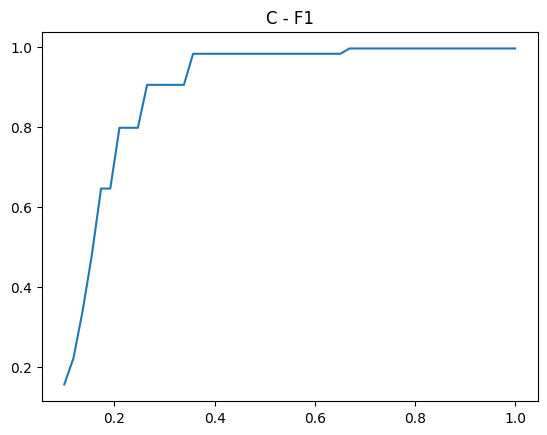

In [18]:
zhexiantu(np.linspace(0.1,1,50),f1_list,"C - F1")

### 0.36 到 0.4 中寻找最合适的 C

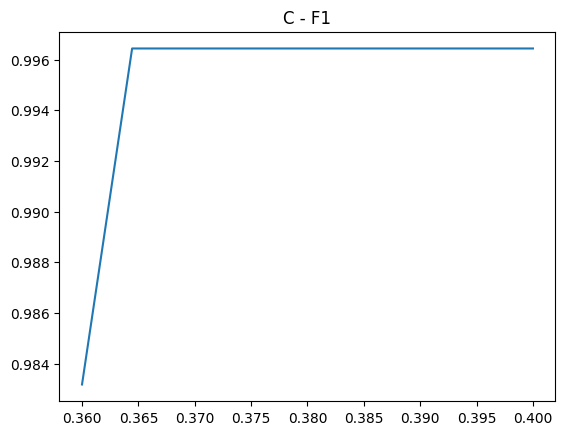

In [19]:
f1_list = []
for c_ in np.linspace(0.36,4,10):
    clf = SVC(kernel='rbf',C=c_,gamma=gamma)
    clf = clf.fit(Xtrain,Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(np.linspace(0.36,0.4,10),f1_list,"C - F1")

### 最终确定 C = 0.365

In [20]:
clf = SVC(kernel='rbf',C=0.365,gamma=gamma)
clf = clf.fit(Xtrain,Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"SVM_RBF")

#####################SVM_RBF######################
+-----------+-------------------+--------------------+
| precision |       recall      |         f1         |
+-----------+-------------------+--------------------+
|    1.0    | 0.966903073286052 | 0.9831730769230769 |
+-----------+-------------------+--------------------+
